<a href="https://colab.research.google.com/github/tai/colab-tests/blob/main/mnist_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST test on Colab

In [16]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

## Load training/test data and train the model

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                          optimizer=keras.optimizers.Adadelta(),
                          metrics=['accuracy'])

model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 4s 9ms/step - loss: 2.2839 - accuracy: 0.1489 - val_loss: 2.2534 - val_accuracy: 0.2867
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 2.2368 - accuracy: 0.2534 - val_loss: 2.1968 - val_accuracy: 0.5015
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 2.1779 - accuracy: 0.3528 - val_loss: 2.1215 - val_accuracy: 0.5788
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 2.0977 - accuracy: 0.4304 - val_loss: 2.0183 - val_accuracy: 0.6197
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 1.9879 - accuracy: 0.4923 - val_loss: 1.8778 - val_accuracy: 0.6724
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 1.8480 - accuracy: 0.5388 - val_loss: 1.6966 - val_accuracy: 0.7313
Epoch 7/12

## Identify test images

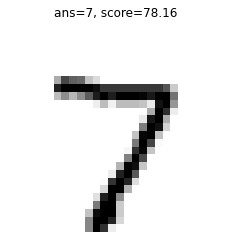

In [ ]:
def predict(model, img):
    pred = model.predict(img)
    ans = np.argmax(pred)
    score = np.max(pred) * 100

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.axis('off')
    ax.title.set_fontsize(16)
    ax.set_title('ans={}, score={:.2f}'.format(ans, score))
    ax.imshow(img.reshape(28, 28), cmap=cm.gray_r)

predict(model, x_test[0].reshape((-1, 28, 28, 1)))

## Save trained model data

In [18]:
# Save in HDF5 format (Keras style)
model.save("mnist-model.h5")

In [20]:
# Save TFLite model
livecv = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file("mnist-model.h5")
tflite_model = livecv.convert()
with open("mnist-model.tflite", "wb") as f: f.write(tflite_model)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpa0jy7x0c/assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from /tmp/tmpa0jy7x0c/variables/variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_

## Save part of test data for faster re-test

In [23]:
np.savez("mnist-test-100.npz", x_test[0:100])

In [24]:
!ls -l

total 19112
drwx------ 4 root root     4096 Dec  6 03:35 drive
-rw-r--r-- 1 root root 14441344 Dec  6 03:29 mnist-model.h5
-rw-r--r-- 1 root root  4802340 Dec  6 03:30 mnist-model.tflite
-rw-r--r-- 1 root root   313864 Dec  6 03:37 mnist-test-100.npz
drwxr-xr-x 1 root root     4096 Dec  2 22:04 sample_data
